In [1]:
import os.path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import h5py

from data_utils import *
from viz_utils import *
from numpy.lib.stride_tricks import as_strided

### Extracting data

In [ ]:
#COMMON STUFF

area_label = 'sierra negra'
central_pixel_x = 500
central_pixel_y = 500
active_range_distance = 120
outer_range_distance = 240

def get_pixel_range(central_pixel: int, distance: int):
    return (central_pixel - distance, central_pixel + distance)

active_range = get_pixel_range(central_pixel_x, active_range_distance), get_pixel_range(central_pixel_y, active_range_distance) # Coordinates of volcano active region
outer_range  = get_pixel_range(central_pixel_x, outer_range_distance), get_pixel_range(central_pixel_y, outer_range_distance) # Width and Height of this region need to be multiple of the grid size used in function "extract_training_data" (grid_size=3 by default)

path = os.path.abspath('./timeseries_demErr.h5')

/media/psf/Home/dev/notebook_volcano_anomaly/data_utils.py:45: RuntimeWarning: Mean of empty slice
  data_strided = np.nanmean(data_strided, axis=(3,4)).reshape(data.shape[0], out_shape[0], out_shape[1])


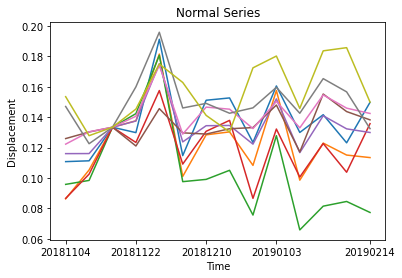

In [4]:
training_data = dict()

# Read data
data, dates = read_data(path)

data_time_steps = data.shape[0] - 1
data_x_resolution, data_y_resolution = data.shape[1:]

training_data[area_label] = dict()
training_data[area_label]['dates'] = dates
extr_series = extract_training_data(data, active_range, outer_range)

extr_reshp = []
for j in range(extr_series.shape[1]):
    for i in range(extr_series.shape[2]):
        serie = extr_series[:, j, i]
        assert (len(dates) == serie.shape[0])
        extr_reshp.append(serie)
extr_reshp = np.array(extr_reshp)

plot_data = {'series' : extr_reshp,
             'dates' : dates,
             'label' : None,
             'id' : "sierra negra"}

# Reshape to 3D format expected by LSTM: [samples, timesteps, features]
extr_reshp = extr_reshp.reshape(len(dates), len(extr_reshp))
training_data[area_label]['series'] = np.expand_dims(extr_reshp, axis=0)

plot_1dseries(plot_data, dates)

pickle.dump(training_data, open('training_data.p', 'wb'))